In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime
import os

from utilities import count_outliers

sensor_number = 50

files_raw = glob.glob("D:/Praca Magisterska/nowe/pedestals_subtracted/*.csv")
files_calib = glob.glob("D:/Praca Magisterska/nowe/Tell1CalibCsv/*.csv")

mean_sensor = []
means_abs_sensor = []
stddevs_sensor = []
outliers_sensor = []

means = []
means_abs = []
stddevs = []
outliers = []
timestamps = []
for file in files_raw:
    data = pd.read_csv(file ,sep=' ', header=None, usecols=range(4,2053))
    timestamp = datetime.datetime.strptime(data.iloc[0][4], '%Y-%m-%dT%H:%M:%S')
    timestamps.append(timestamp)
    del data[4]
    mean = data.mean().mean()
    mean_abs = data.abs().mean().mean()
    stddev = data.stack().std()
    means.append(mean)
    means_abs.append(mean_abs)
    stddevs.append(stddev)
    outliers.append(count_outliers(data))
    mean_sensor.append(data.loc[sensor_number,:].mean())
    means_abs_sensor.append(data.abs().loc[sensor_number,:].mean())
    stddevs_sensor.append(data.loc[sensor_number,:].std())
    outliers_sensor.append(count_outliers(data.loc[sensor_number,:]))

calib_timestamps = []
for file in files_calib:
    file_name = os.path.basename(file)
    file_name_timestamp = datetime.datetime.strptime(file_name, '%Y_%m_%d-%H_%M_%S.csv')
    if (file_name_timestamp > min(timestamps)) and (file_name_timestamp < max(timestamps)):
        calib_timestamps.append(file_name_timestamp)

calib_timestamps_copy = calib_timestamps.copy()
calib_timestamps_copy.append(datetime.datetime.now())

trends_mean_sensor = []
trends_means_abs_sensor = []
trends_stddevs_sensor = []
trends_outliers_sensor = []

trends_means = []
trends_outliers = []
trends_means_abs = []
trends_stddevs = []
trends_timestamps = []
counter = 0
for calib_timestamp_index in range(len(calib_timestamps_copy)):
    trends_mean_sensor.append([])
    trends_outliers_sensor.append([])
    trends_means_abs_sensor.append([])
    trends_stddevs_sensor.append([])
    
    trends_means.append([])
    trends_outliers.append([])
    trends_means_abs.append([])
    trends_stddevs.append([])
    trends_timestamps.append([])
    while (timestamps[counter] < calib_timestamps_copy[calib_timestamp_index]) & (counter < len(timestamps)-1):
        trends_means[calib_timestamp_index].append(means[counter])
        trends_outliers[calib_timestamp_index].append(outliers[counter])
        trends_means_abs[calib_timestamp_index].append(means_abs[counter])
        trends_stddevs[calib_timestamp_index].append(stddevs[counter])
        
        trends_mean_sensor[calib_timestamp_index].append(mean_sensor[counter])
        trends_outliers_sensor[calib_timestamp_index].append(outliers_sensor[counter])
        trends_means_abs_sensor[calib_timestamp_index].append(means_abs_sensor[counter])
        trends_stddevs_sensor[calib_timestamp_index].append(stddevs_sensor[counter])
        trends_timestamps[calib_timestamp_index].append(timestamps[counter])
        counter = counter + 1

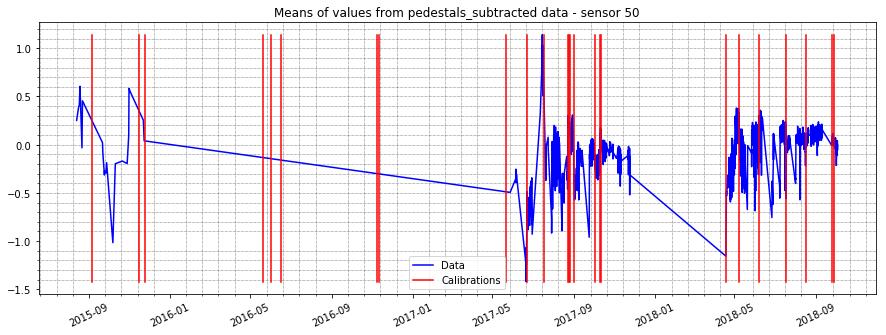

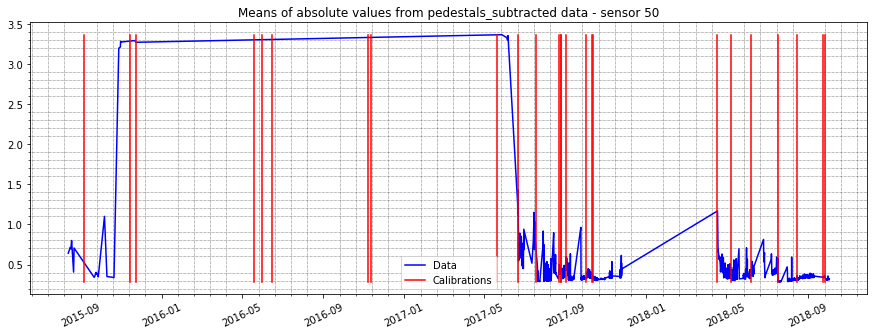

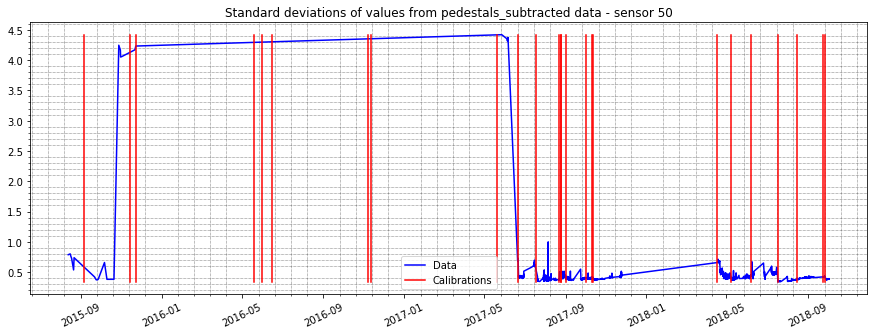

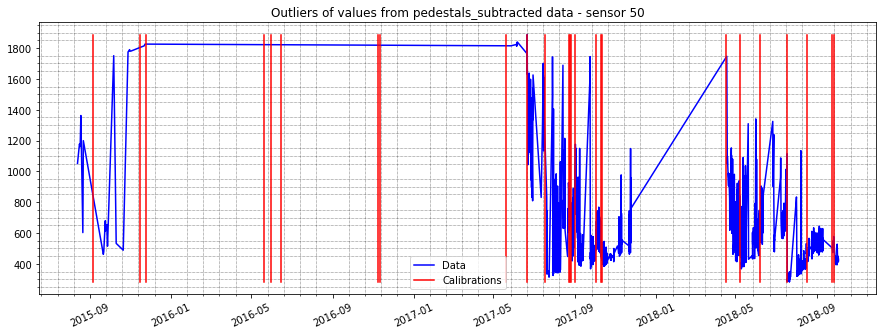

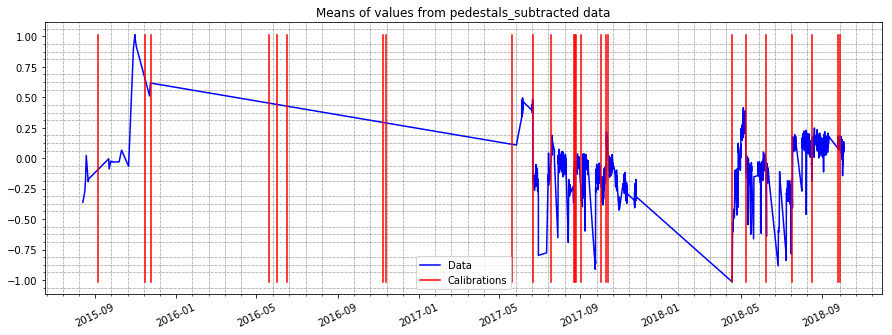

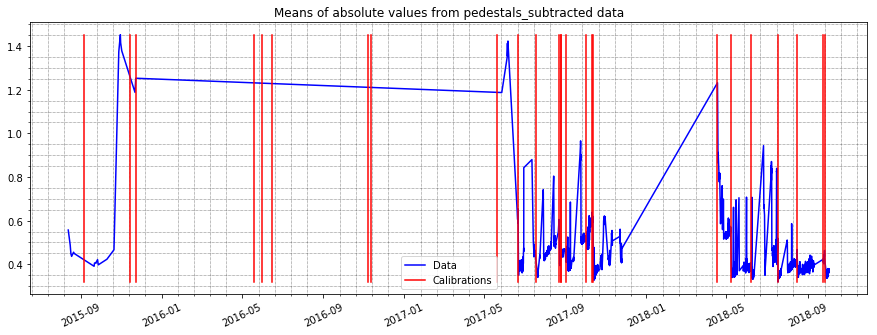

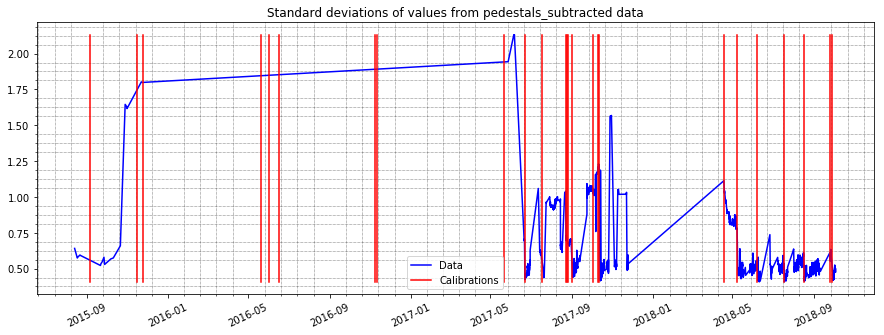

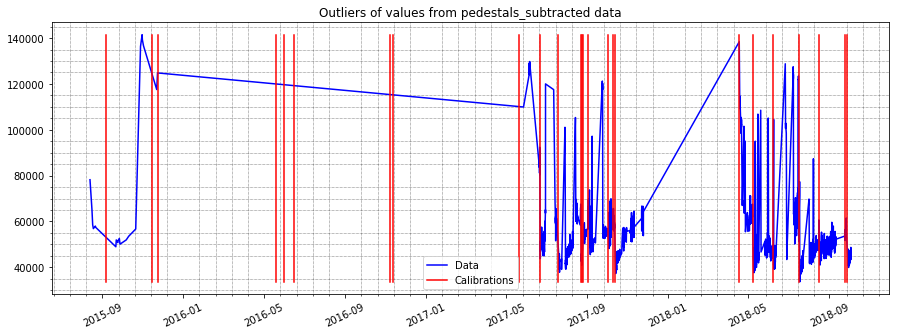

In [3]:
fig, ax = plt.subplots()
ax.set_title('Means of values from pedestals_subtracted data - sensor {}'.format(sensor_number))
ax.plot(timestamps, mean_sensor, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(mean_sensor),max(mean_sensor)], 'r', label='Calibrations')
    
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()


fig, ax = plt.subplots()
ax.set_title('Means of absolute values from pedestals_subtracted data - sensor {}'.format(sensor_number))
ax.plot(timestamps, means_abs_sensor, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(means_abs_sensor),max(means_abs_sensor)], 'r', label='Calibrations')

plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()


fig, ax = plt.subplots()
ax.set_title('Standard deviations of values from pedestals_subtracted data - sensor {}'.format(sensor_number))
ax.plot(timestamps, stddevs_sensor, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(stddevs_sensor),max(stddevs_sensor)], 'r', label='Calibrations')
    
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()


fig, ax = plt.subplots()
ax.set_title('Outliers of values from pedestals_subtracted data - sensor {}'.format(sensor_number))
ax.plot(timestamps, outliers_sensor, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(outliers_sensor),max(outliers_sensor)], 'r', label='Calibrations')
   
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()


fig, ax = plt.subplots()
ax.set_title('Means of values from pedestals_subtracted data')
ax.plot(timestamps, means, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(means),max(means)], 'r', label='Calibrations')
   
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()


fig, ax = plt.subplots()
ax.set_title('Means of absolute values from pedestals_subtracted data')
ax.plot(timestamps, means_abs, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(means_abs),max(means_abs)], 'r', label='Calibrations')
  
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()


fig, ax = plt.subplots()
ax.set_title('Standard deviations of values from pedestals_subtracted data')
ax.plot(timestamps, stddevs, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(stddevs),max(stddevs)], 'r', label='Calibrations')
   
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()


fig, ax = plt.subplots()
ax.set_title('Outliers of values from pedestals_subtracted data')
ax.plot(timestamps, outliers, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(outliers),max(outliers)], 'r', label='Calibrations')
    
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()